### **Stock Price Prediction**

Import important libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


Read data from csv file

In [2]:

# Read data from file
df = pd.read_csv("/content/drive/MyDrive/NFLX.csv")


display some records of dataset

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


cheacking the features of  dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1009 entries, 0 to 1008

Data columns (total 7 columns):

 #   Column     Non-Null Count  Dtype  

---  ------     --------------  -----  

 0   Date       1009 non-null   object 

 1   Open       1009 non-null   float64

 2   High       1009 non-null   float64

 3   Low        1009 non-null   float64

 4   Close      1009 non-null   float64

 5   Adj Close  1009 non-null   float64

 6   Volume     1009 non-null   int64  

dtypes: float64(5), int64(1), object(1)

memory usage: 55.3+ KB


analyzing null values

In [13]:
null_count = df.isnull().sum()
print(null_count)

Date         0

Open         0

High         0

Low          0

Close        0

Adj Close    0

Volume       0

dtype: int64


is there any duplicate values are exist

In [14]:
# Counting the number of duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [ ]:
Do some statistical analysis on data

In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


do feature engineering which help to improve performance of mode.. Extracting new features from existing features


In [21]:
#Feature engineering to extract useful information
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Feature Engineering: Extracting useful features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day



split data in features and target

In [22]:
# Selecting features and target
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
y = df['Close']

Visulaize each feature to see the distribution of data

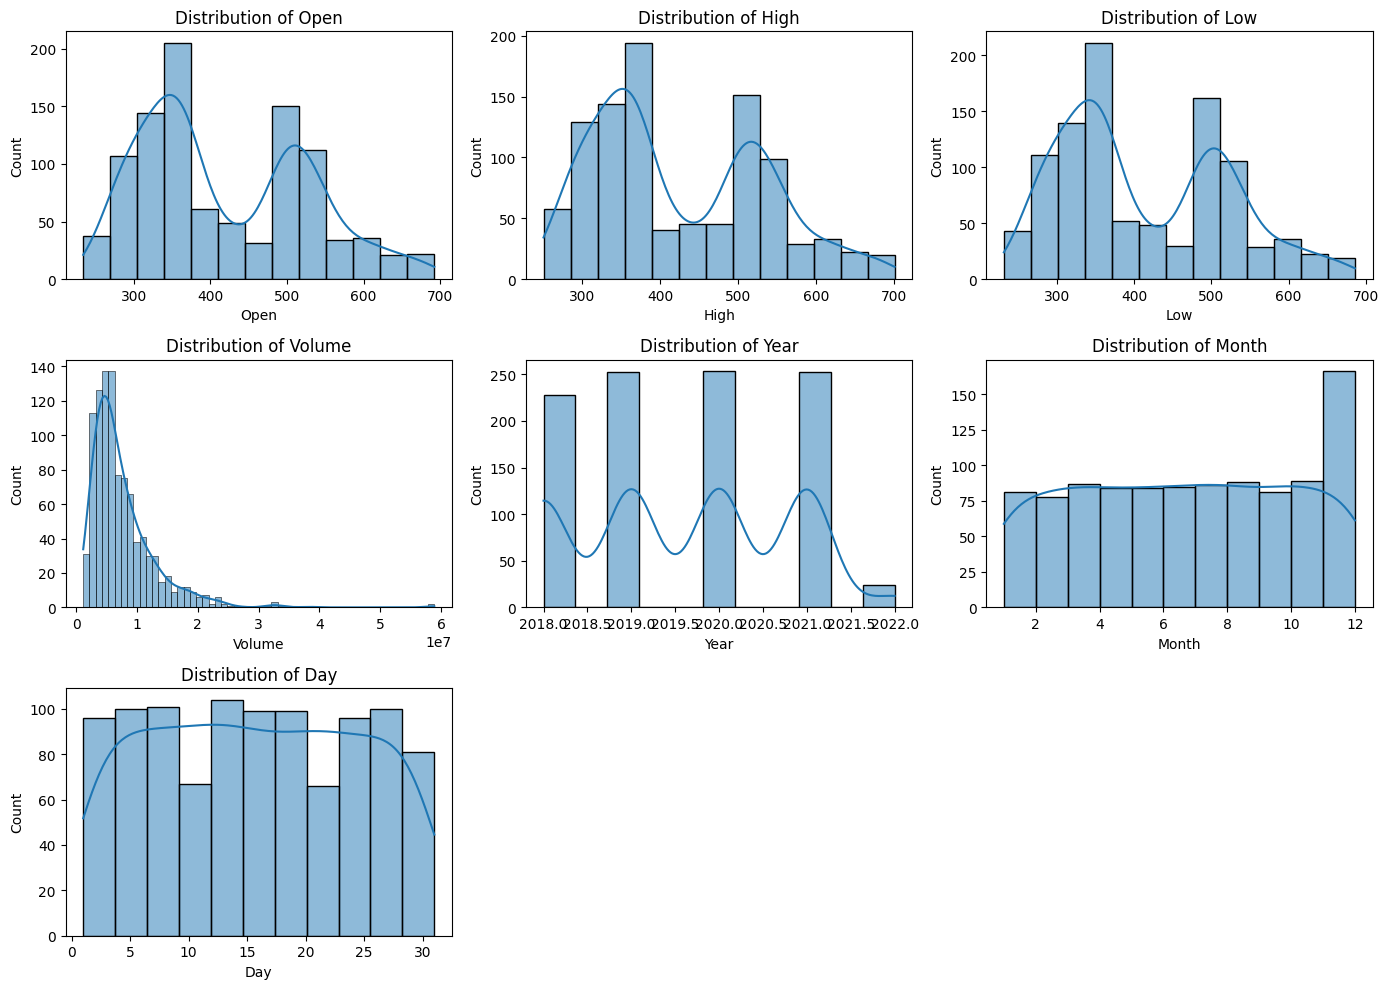

In [23]:
# Step 3: Visualizing the Distribution of the Features
plt.figure(figsize=(14, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Find the relationship between each feature using corelation heat map


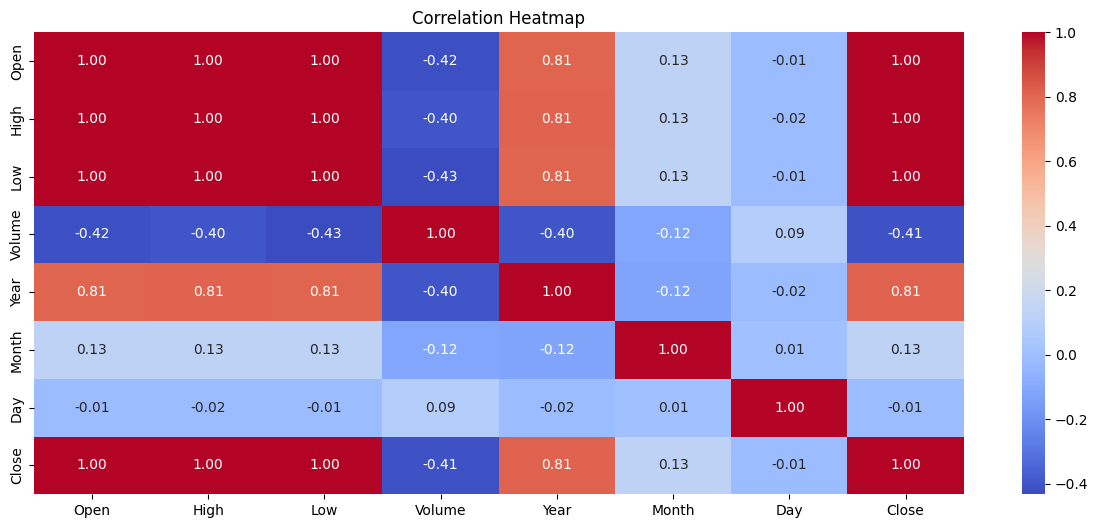

In [26]:
# Step 4: Correlation Analysis Using a Heatmap
data = pd.concat([X, y], axis=1)
corr_matrix = data.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

checking which features are highly corelated with target feature target

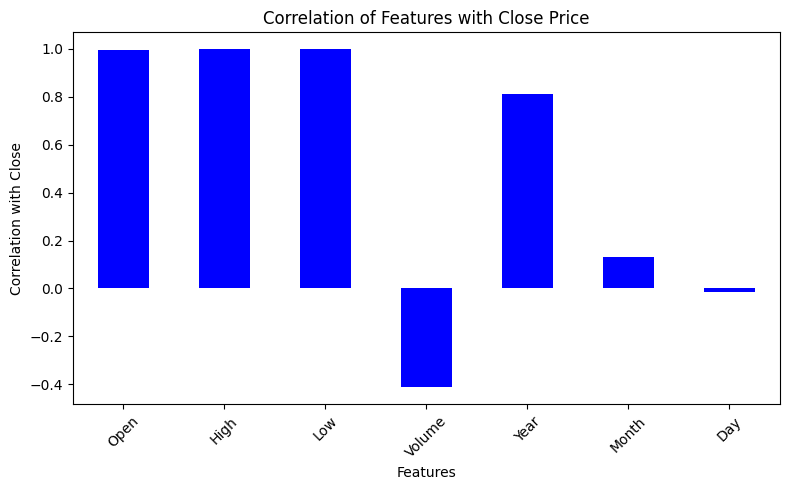

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features and target
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
y = df['Close']

# Concatenating features and target for correlation analysis
data = pd.concat([X, y], axis=1)

# Calculating the correlation matrix
corr_matrix = data.corr()

# Extracting the correlation values of features with the target variable 'Close'
correlations = corr_matrix['Close'].drop('Close')

# Plotting the bar chart
plt.figure(figsize=(8, 5))
correlations.plot(kind='bar', color='blue')
plt.title('Correlation of Features with Close Price')
plt.xlabel('Features')
plt.ylabel('Correlation with Close')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


boxplots by  categorical features


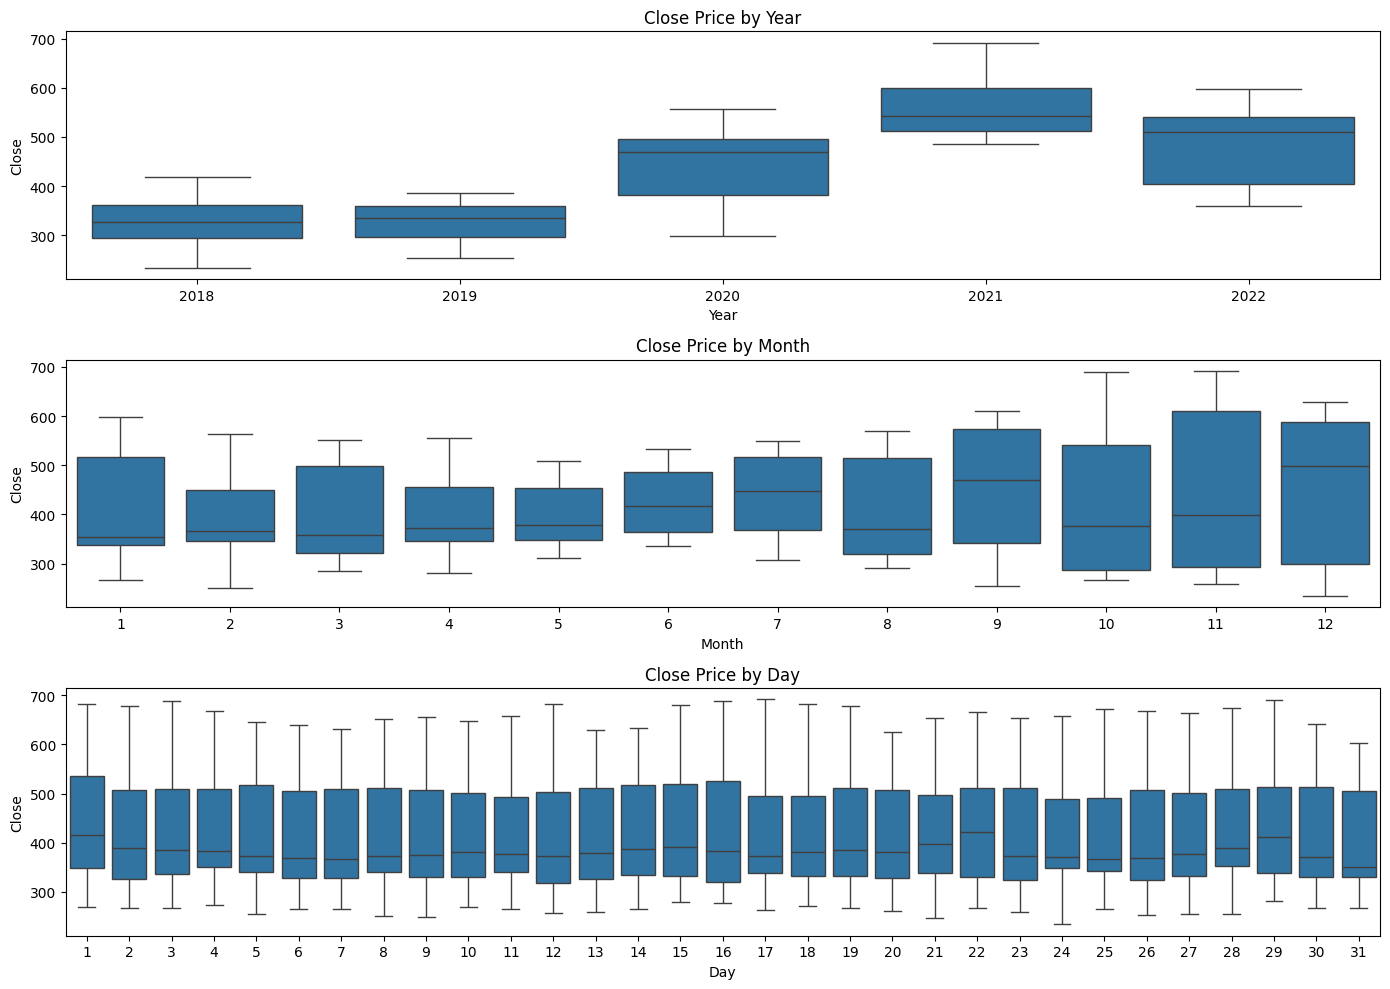

In [28]:
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x='Year', y='Close', data=data)
plt.title('Close Price by Year')
plt.subplot(3, 1, 2)
sns.boxplot(x='Month', y='Close', data=data)
plt.title('Close Price by Month')
plt.subplot(3, 1, 3)
sns.boxplot(x='Day', y='Close', data=data)
plt.title('Close Price by Day')
plt.tight_layout()
plt.show()

Split data into train and test

In [32]:

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print("size of training feaures: ",len(X_train))
print("size of training labels: ",len(y_train))
print("size of testing features: ",len(X_test))
print("size of testing labels: ",len(y_test))

size of training feaures:  807

size of training labels:  807

size of testing features:  202

size of testing labels:  202


scale the features between 0 and 1

In [36]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

define functions for model evaluation

In [37]:
# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    return train_mse, test_mse, train_r2, test_r2

models used for training

In [38]:
# Models and their parameters for hyperparameter tuning
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

checking on different perameters

In [39]:
# Hyperparameter grid
param_grid = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [3, 5, 7, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10]}
}


Grid searching

In [40]:
# GridSearchCV for hyperparameter tuning
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_

Best model for this data and its result

In [41]:
# Evaluate best models
results = {}
for model_name in best_models:
    train_mse, test_mse, train_r2, test_r2 = evaluate_model(best_models[model_name], X_train_scaled, y_train, X_test_scaled, y_test)
    results[model_name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R2': train_r2,
        'Test R2': test_r2
    }

results

{'Linear Regression': {'Train MSE': 14.744129225466807,
  'Test MSE': 16.20290983223432,
  'Train R2': 0.998742676994623,
  'Test R2': 0.9986103920916349},
 'Decision Tree': {'Train MSE': 1.142195095788866,
  'Test MSE': 46.45609225159643,
  'Train R2': 0.9999025979663768,
  'Test R2': 0.996015792604355},
 'Random Forest': {'Train MSE': 4.1134255643339195,
  'Test MSE': 27.074557213434794,
  'Train R2': 0.999649222784618,
  'Test R2': 0.997678008505335}}

Plotting actual and predicted values

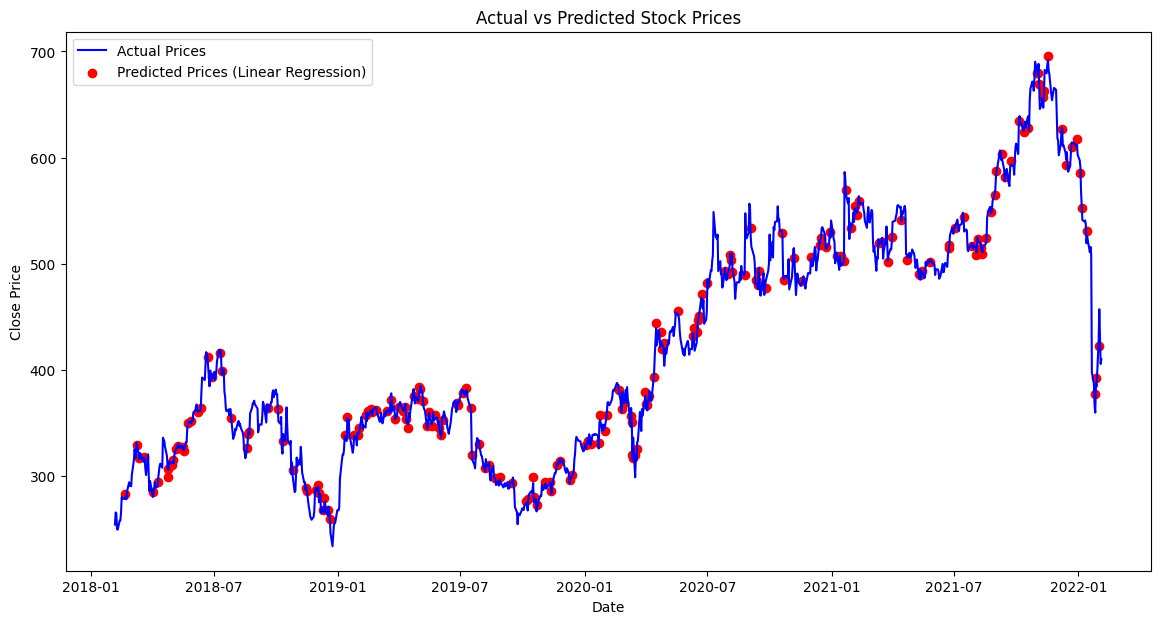

In [42]:
# Plotting the actual vs predicted values for the best model (Linear Regression)
best_model = best_models['Linear Regression']
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='b')
plt.scatter(df.loc[y_test.index]['Date'], y_pred, label='Predicted Prices (Linear Regression)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
